In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # data visualization library
from scipy import stats
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [61]:
data = pd.read_csv('./input/cancer.csv', delimiter= ',')
data.head

         M       19.170         24.80          132.40     1123.0   
12     846381         M       15.850         23.95          103.70      782.7   
13   84667401         M       13.730         22.61           93.60      578.3   
14   84799002         M       14.540         27.54           96.73      658.8   
15     848406         M       14.680         20.13           94.74      684.5   
16   84862001         M       16.130         20.68          108.10      798.8   
17     849014         M       19.810         22.15          130.00     1260.0   
18    8510426         B       13.540         14.36           87.46      566.3   
19    8510653         B       13.080         15.71           85.63      520.0   
20    8510824         B        9.504         12.44           60.34      273.9   
21    8511133         M       15.340         14.26          102.50      704.4   
22     851509         M       21.160         23.04          137.20     1404.0   
23     852552         M       16.650     

In [62]:
x = data.iloc[:, 2:]
y = data.iloc[:, 1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x.shape, y.shape 


((568, 30), (568,))

Number of Benign:  357
Number of Malignant :  211


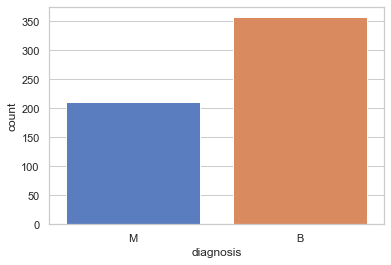

In [63]:
ax = sns.countplot(y, label="Count")
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [64]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compacteness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compacteness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,0.062770,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,0.007035,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,0.057697,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,0.061515,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,0.066120,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

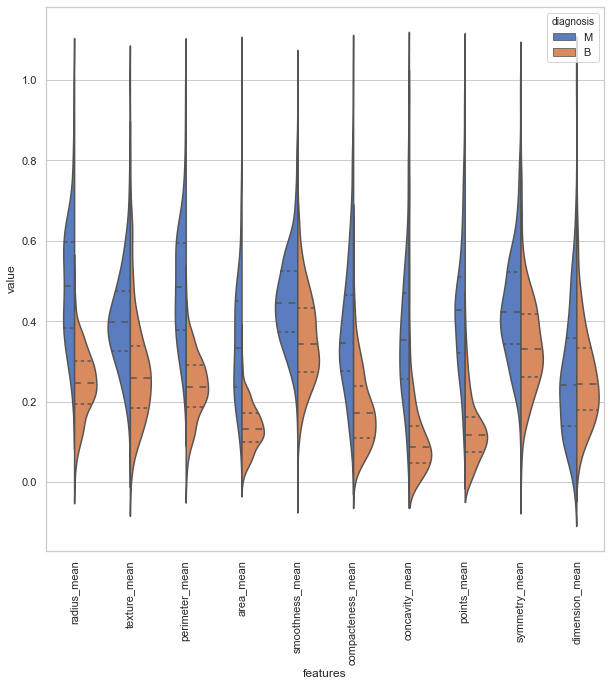

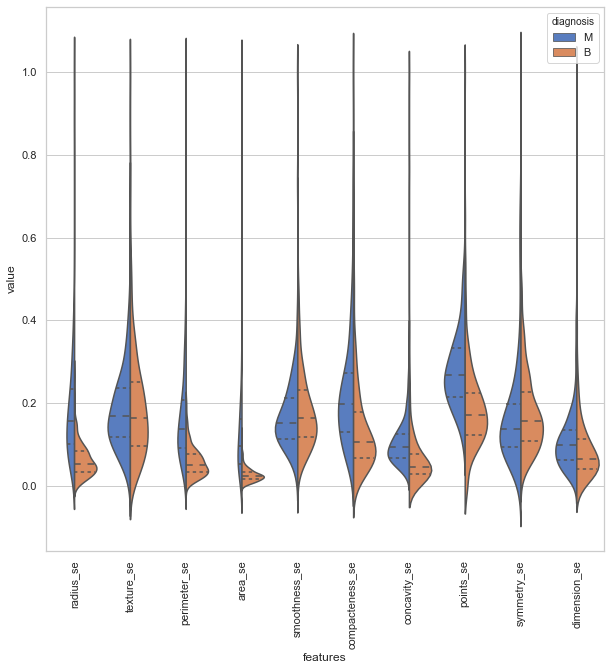

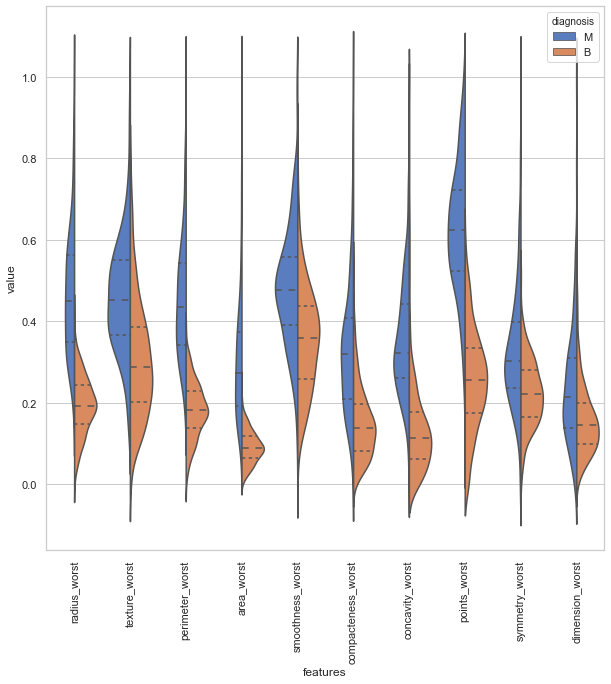

In [65]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns=x.columns)


data = pd.concat([y, x.iloc[:, 0:10]], axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)


data = pd.concat([y, x.iloc[:, 10:20]], axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)


data = pd.concat([y, x.iloc[:, 20: ]], axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

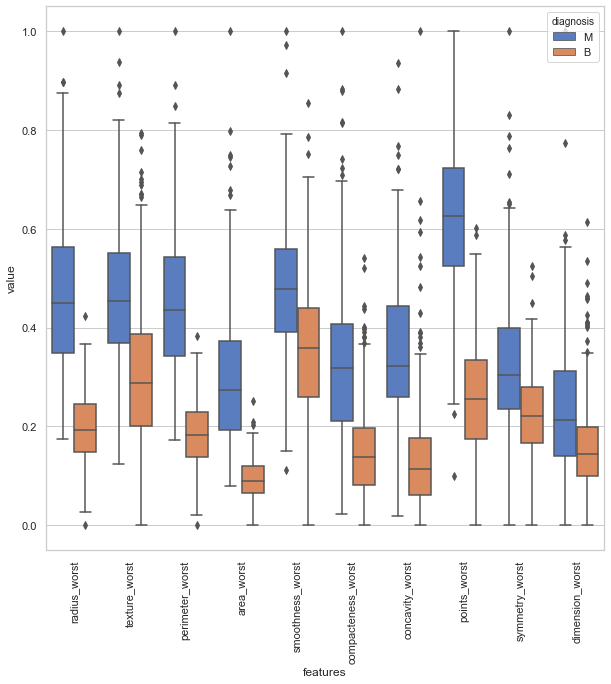

In [66]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

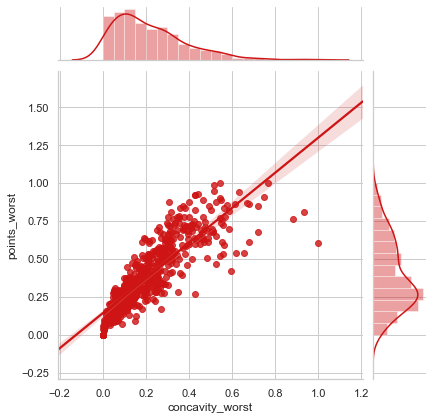

In [67]:
sns.jointplot(x.loc[:,'concavity_worst'], x.loc[:,'points_worst'], kind="regg", color="#ce1414")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

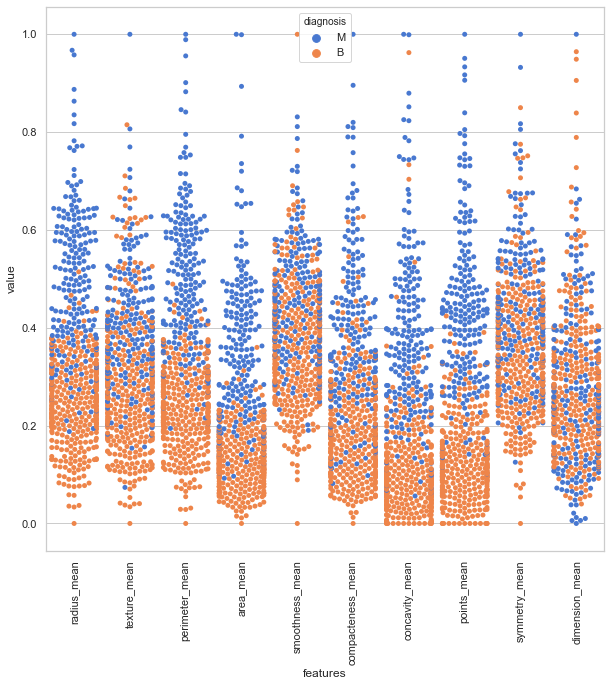

In [68]:
sns.set(style="whitegrid", palette="muted")
        # standardization
data = pd.concat([y,x.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

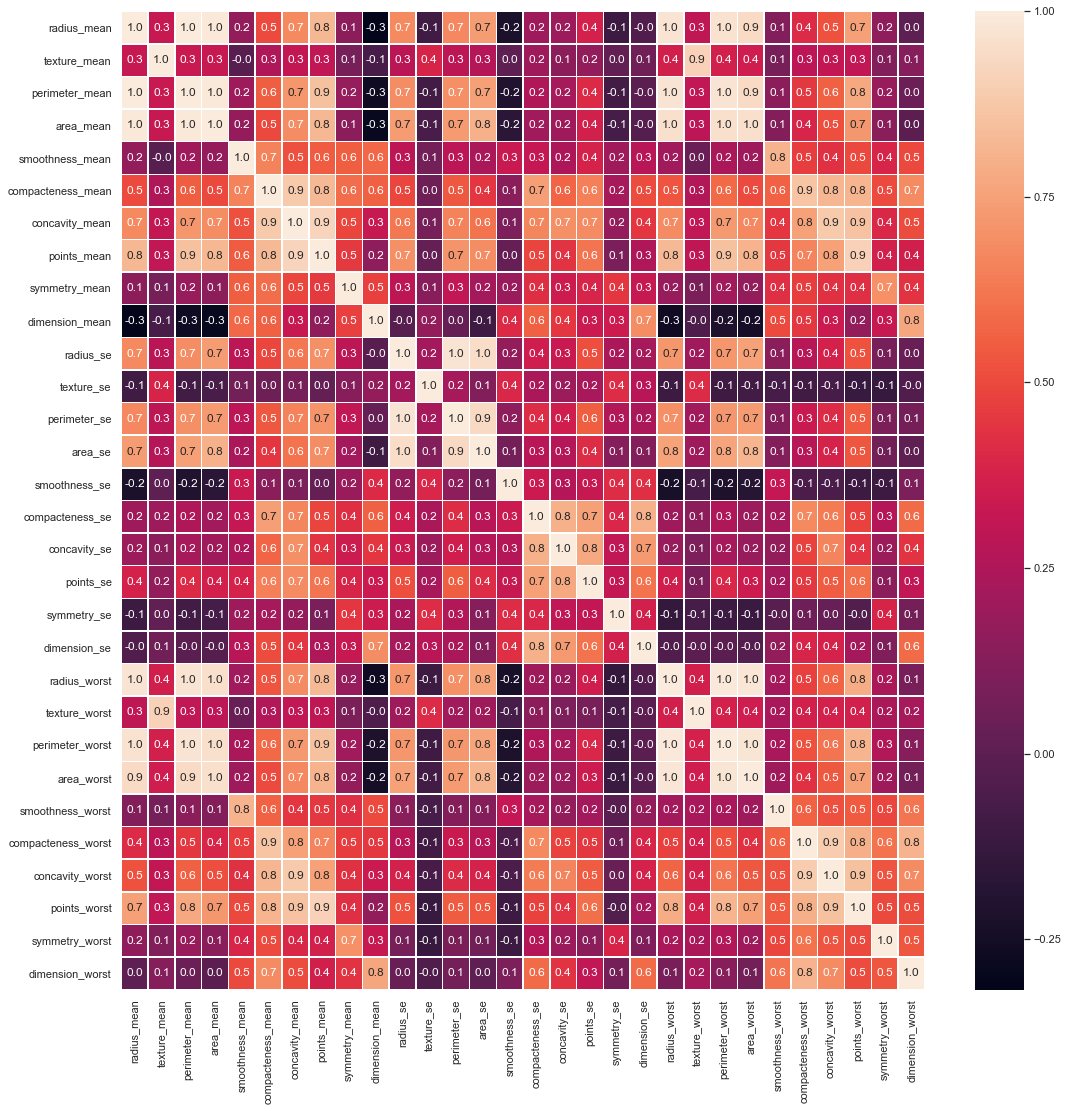

In [69]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [75]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

x_train = pd.DataFrame(x_train, columns=x.columns)
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 1

In [85]:
print(rfecv.support_)

x_train = pd.DataFrame(x_train, columns=x.columns)
x_test = pd.DataFrame(x_test, columns=x.columns)

data = x_train.iloc[:, rfecv.support_]
valid_data = x_test.iloc[:, rfecv.support_]


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le = le.fit(y_train)

y_train = le.transform(y_train)
y_test = le.transform(y_test)


[ True  True False  True  True False  True  True False  True False False
 False  True False False  True False  True False  True  True  True  True
  True  True  True  True False  True]


In [86]:
from keras.models import Model, Input
from keras.layers import Dense

shape = x_train.shape[1]
def build_model():
    model_input = Input(shape=(shape,))
    
    x = Dense(64, activation='relu')(model_input)
    x = Dense(8, activation='relu')(x)
    
    output = Dense(1, activation='sigmoid')(x)

    model = Model(model_input, output)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

model = build_model()
model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

loss, _ = model.evaluate(x_test, y_test)

print(loss)




Train on 426 samples, validate on 142 samples
Epoch 1/100
426/426 [==============================] - 1s 2ms/step - loss: 0.6875 - accuracy: 0.4460 - val_loss: 0.6727 - val_accuracy: 0.5634
Epoch 2/100
426/426 [==============================] - 0s 101us/step - loss: 0.6614 - accuracy: 0.6995 - val_loss: 0.6523 - val_accuracy: 0.7887
Epoch 3/100
426/426 [==============================] - 0s 110us/step - loss: 0.6383 - accuracy: 0.7700 - val_loss: 0.6294 - val_accuracy: 0.7394
Epoch 4/100
426/426 [==============================] - 0s 112us/step - loss: 0.6106 - accuracy: 0.8521 - val_loss: 0.6046 - val_accuracy: 0.8732
Epoch 5/100
426/426 [==============================] - 0s 119us/step - loss: 0.5801 - accuracy: 0.8897 - val_loss: 0.5736 - val_accuracy: 0.8521
Epoch 6/100
426/426 [==============================] - 0s 131us/step - loss: 0.5438 - accuracy: 0.9014 - val_loss: 0.5392 - val_accuracy: 0.8592
Epoch 7/100
426/426 [==============================] - 0s 162us/step - loss: 0.5021 - 